pyZDCF
======

A Brief Introduction to pyZDCF
------------------------------

The next module in pyPetal uses pyZDCF, a code which computes the Z-transformed Discrete Correlation Function between two light curves.

pyCCF and JAVELIN both assume an interpolation scheme to compute the cross-correlation function (CCF) and find time lag distributions between sets of unevenly sampled light curves. However, using these interpolation schemes inherently places assumptions on the results obtained from the following analysis.

The discrete correlation function (DCF) offers a way of analyzing the correlation between two light curves without any assumptions. However, the lack of assumptions also comes at a price: the robustness of the DCF is dependent on the number of data points in the light curves.

The DCF is defined as follows:

${\rm DCF}_{ij} = \frac{(a_i - \bar{a'})(b_i - \bar{b'})}{s'_a s'_b}$

for light curves $a,b$ with sample means $\bar{a}, \bar{b}$ and sample variances ${{s'}_a}^2, {{s'}_b}^2$

The DCF is usually binned into different time lags $\tau_{ij} = t_i - t_j$, with each bin being of equal width. The mean and standard deviation of the DCF in each bin is then used to estimate CCF($\tau) and its uncertainty.

The ZDCF is a way to approximate the DCF with the z-transform. 

Firstly, the CCF is estimated by the correlation coefficient:

$r = \frac{\sum^n_i (a_i - \bar{a})(b_i - \bar{b})/(n-1)}{s_a s_b}$

for $\bar{a}, \bar{b}$ the estimators of the bin averages and $s_a, s_b$ the estimators of the bin standard deviations.

Define:

* $z = \frac{1}{2} \left( \frac{1+r}{1-r} \right)$
* $\zeta = \frac{1}{2}\left( \frac{1+\rho}{1-\rho} \right)$
* $r = \tanh(z)$

Assume the ansatz that $\rho = r$, which grants:

$\delta r_{\pm} = | \tanh( \bar{z}(r) \pm s_z(r) ) - r |$

for the error in a given bin with mean $\bar{z}$ and standard deviation $s_z$.

Thus, with a given list of bins and their corresponding means and standard deviations, the ZDCF can be computed.

The binning method for the ZDCF is unique in the sense that it is equal in terms of population, not width. Therefore, bins may be of unequal width. Each bin must also have a minimum number of points $n_{\rm min} = 11$.

There is much more care taken in the computation of the ZDCF than in this short introduction, including the reduction of bias and the binning algorithm. For a more detailed description of the entire ZDCF algorithm, see <cite data-cite="alexander_is_1997">Alexender (1997)</cite> and <cite data-cite="alexander_improved_2013">Alexander (2013)</cite>.

pyZDCF Arguments
----------------

The original ZDCF code written in Fortran <cite data-cite="alexander_zdcf_2014">Alexander (2014)</cite> has recently been implemented in Python in pyZDCF <cite data-cite="jankov_pyzdcf_2022">Jankov et al (2022)</cite>.

pyZDCF will take in two light curve files and produce the ZDCF between them, outputting a pandas.DataFrame object. The pyZDCF code can compute the ZDCF between two light curves, as well as the auto-correlation function (ACF) of a single light curve, but pyPetal only utilizes the ZDCF functionality.

The following arguments can be used in pyPetal's pyZDCF module:

* ``nsim``: The number of Monte Carlo runs to perform. Default is 1000.

* ``minpts``: The minimum number of points to have in a bin. If 0, the minimum number of points is set to 11. Default is 0.

* ``uniform_sampling``: If ``True``, the light curves are assumed to be uniformly sampled. Default is ``False``.

* ``omit_zero_lags``: If ``True``, will omit points with zero lags when computing the ZDCF. Default is ``True``.

* ``sparse``: Determines whether to use a sparse matrix implementation for reduced RAM usage. This feature is suitable for longer light curves (> 3000 data points). If True, will use sparse matrix implementation. If set to "auto", will use sparse matrix implementation if there are more than 3000 data points per light curve. Default is "auto"

* ``prefix``: The prefix to use for the output ZDCF file. Default is "zdcf".

Using the Module
----------------

Here, we'll run pyPetal using the pyZDCF module to compute the ZDCF between two example light curves from pyZDCF:

In [1]:
main_dir = 'pypetal/examples/dat/pyzdcf_'
filenames = [main_dir + 'lc1.dat', main_dir + 'lc2.dat']

line_names = ['Continuum', 'H-alpha']
output_dir = 'pyzdcf_output/'


Running pyZDCF
----------------------
nsim: 1000
minpts: 14
uniform_sampling: False
omit_zero_lags: True
sparse: auto
prefix: pyzdcf
run_plike: False
plike_dir: None
----------------------
        


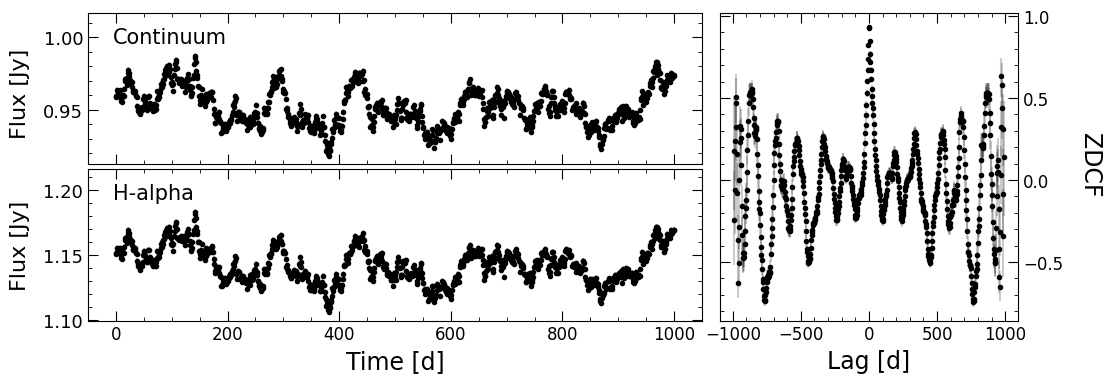

In [2]:
import pypetal.pipeline as pl

params = {
    'nsim': 1000,
    'prefix': 'pyzdcf',
    'minpts': 14
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                      run_pyzdcf=True,
                      pyzdcf_params=params,
                      verbose=True,
                      plot=True,
                      time_unit='d',
                      lc_unit='Jy',
                      file_fmt='csv')

Here, we only used one "continuum" and one "line" light curve. If we input more than one line, pyPetal will compute the ZDCF for each line with the continuum light curve.

pyZDCF Output Files
-------------------

pyZDCF originally only outputs the pandas.DataFrame containing the ZDCF and its uncertainty. pyPetal outputs this same file, labeled "``(line_name)``_``prefix``.zdcf", as well as a figure, in the ``pyzdcf/`` subdirectory for each line.

The ZDCF file has the following columns (in order):

* ``tau``: The time lags.

* ``-sig(tau)``: The lower uncertainty for $\tau$ in a given bin.

* ``+sig(tau)``: The upper uncertainty for $\tau$ in a given bin.

* ``dcf``: The ZDCF.

* ``-err(dcf)``: The lower uncertainty for the ZDCF.

* ``+err(dcf)``: The upper uncertainty for the ZDCF.

* ``#bin``: The number of points in a given bin.


The figure will contain the continuum and line light curves, as well as their ZDCF and uncertainty.

pyZDCF Output Dict
------------------

The pyZDCF module will output a list of pandas.DataFrame objects, one for each line. This list will be stored in the ``pyzdcf`` key of the output dictionary.